<h1>Compute 95% Confidence Interval for SIR Predictions</h1>

<p>In this tutorial we are going how to insert uncertainties in our preditctions. For achive it we are going to compute a non-parametric interval around our predictions. The interval is created using a techinique called bootstrap.</p>

<p>It's easy to compute confidence interval using the class SIR_EDO. This class now have a method calling fit_predictCI that returns a pandas data frame, with all you need to put uncertainties around your predictions. This methods take advantage of multprocessing system and can be distributed across your system.</p>

In [1]:
import multiprocessing as mp
import sys
#add the path were the models are
sys.path.append("../main/")
import pandas as pd
import numpy as np
from plotnine import *
from mizani.breaks import date_breaks
from mizani.formatters import date_format
from itertools import repeat
import time
from functools import reduce
from modelos import SIR_EDO
#set default theme for plts
theme_set(theme_linedraw())

In [2]:
data = pd.read_csv("../data/estados.csv")
#Select only Sao Paulo
sp = data[data["state"] == "SP"]
#Remove missing values to not crash the intervals
sp = sp.dropna()
#create a series with the cummulative number of cases
y = sp["TOTAL"]

#Give the number of days since the day of first case confirmed
x = range(1,len(sp["TOTAL"]) + 1)

In [3]:
#start model
model = SIR_EDO(50000000)

In [4]:
model.fit(x = x, y = y)

In [5]:
resultdf = model.predictCI(x =x, y = y, ndays = 30, start = "2020-02-25",  bootstrap = 100, n_jobs = 8)

In [6]:
resultdf

,date,Pred,Pred_lb,Pred_ub,I,I_lb,I_ub,S,S_lb,S_ub,R,R_lb,R_ub
0,2020-02-25,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000e+07,5.000000e+07,5.000000e+07,0.000000,0.000000,0.000000
1,2020-02-26,1.375966,1.324582,1.415068,1.167086,1.118402,1.201743,5.000000e+07,5.000000e+07,5.000000e+07,0.208880,0.177569,0.219816
2,2020-02-27,1.814935,1.689297,1.911324,1.362421,1.250786,1.443987,5.000000e+07,5.000000e+07,5.000000e+07,0.452514,0.385992,0.482038
3,2020-02-28,2.327723,2.097235,2.504792,1.590893,1.398820,1.734936,5.000000e+07,5.000000e+07,5.000000e+07,0.736831,0.628756,0.794918
4,2020-02-29,2.928516,2.562957,3.216588,1.858912,1.564691,2.085426,5.000000e+07,5.000000e+07,5.000000e+07,1.069604,0.916839,1.169326
5,2020-03-01,3.649986,3.087061,4.092542,2.181193,1.754452,2.518621,5.000000e+07,5.000000e+07,5.000000e+07,1.468793,1.264167,1.633722
6,2020-03-02,4.501588,3.681555,5.145782,2.561993,1.969872,3.041194,5.000000e+07,4.999999e+07,5.000000e+07,1.939595,1.635205,2.188231
7,2020-03-03,5.483528,4.346438,6.377352,3.001414,2.210951,3.654615,4.999999e+07,4.999999e+07,5.000000e+07,2.482114,2.064341,2.835917
8,2020-03-04,6.625701,5.081711,7.872805,3.513510,2.477689,4.405441,4.999999e+07,4.999999e+07,4.999999e+07,3.112192,2.554855,3.620133
9,2020-03-05,7.987506,5.888008,9.686571,4.124995,2.770461,5.316772,4.999999e+07,4.999999e+07,4.999999e+07,3.862511,3.071543,4.571030


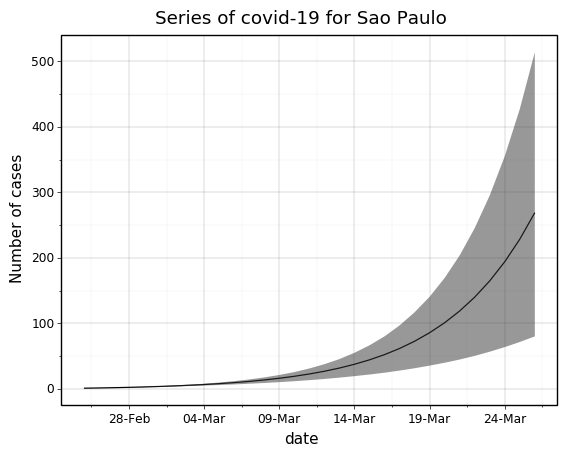

<ggplot: (-9223363287245198876)>

In [7]:
#plot graph using ggplot
(ggplot(resultdf) + 
    geom_line(aes(x = "date", y = "Pred")) +
    geom_ribbon(aes(x = "date", ymin = "Pred_lb", ymax = "Pred_ub"), alpha = 0.5) +
    scale_x_datetime(breaks = date_breaks('5 days'), labels=date_format('%d-%b')) +
    ggtitle("Series of covid-19 for Sao Paulo") +
    ylab("Number of cases"))